In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 5)

# Set path of the dataset
# If you got error with this. Just replace path with the path of your dataset
DATA_PATH = Path("Data") / "Customer-Churn-Records.csv"

# Set dataframe
df = pd.read_csv(DATA_PATH)

# Drop unneeded columns
to_drop = [c for c in ["RowNumber","CustomerId","Surname"] if c in df.columns]
df = df.drop(columns=to_drop)

# Format float to 5 decimal places
pd.set_option('display.float_format', '{:.5f}'.format)

In [99]:
# check shape of the dataset
df.shape

(10000, 15)

In [100]:
# get information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [102]:
# varity of the dataset
df.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [103]:
# convert columns to list
df.columns.tolist()

# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.00000,650.52880,96.65330,350.00000,584.00000,652.00000,718.00000,850.00000
Age,10000.00000,38.92180,10.48781,18.00000,32.00000,37.00000,44.00000,92.00000
Tenure,10000.00000,5.01280,2.89217,0.00000,3.00000,5.00000,7.00000,10.00000
Balance,10000.00000,76485.88929,62397.40520,0.00000,0.00000,97198.54000,127644.24000,250898.09000
NumOfProducts,10000.00000,1.53020,0.58165,1.00000,1.00000,1.00000,2.00000,4.00000
HasCrCard,10000.00000,0.70550,0.45584,0.00000,0.00000,1.00000,1.00000,1.00000
IsActiveMember,10000.00000,0.51510,0.49980,0.00000,0.00000,1.00000,1.00000,1.00000
EstimatedSalary,10000.00000,100090.23988,57510.49282,11.58000,51002.11000,100193.91500,149388.24750,199992.48000
Exited,10000.00000,0.20380,0.40284,0.00000,0.00000,0.00000,0.00000,1.00000
Complain,10000.00000,0.20440,0.40328,0.00000,0.00000,0.00000,0.00000,1.00000


Categorical columns: ['Geography', 'Gender', 'Card Type']


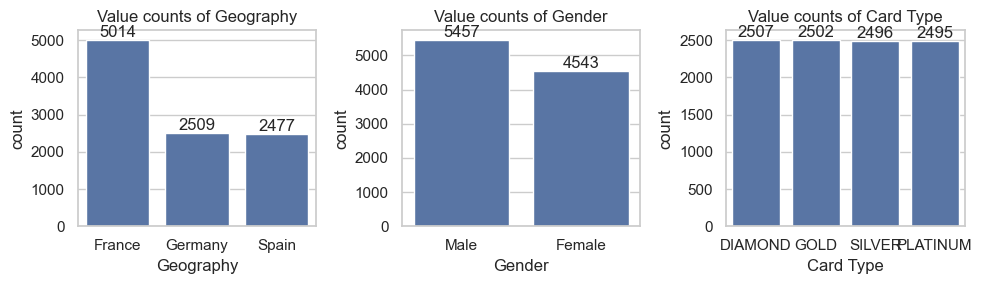

Numeric columns: ['Age', 'Tenure', 'CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']


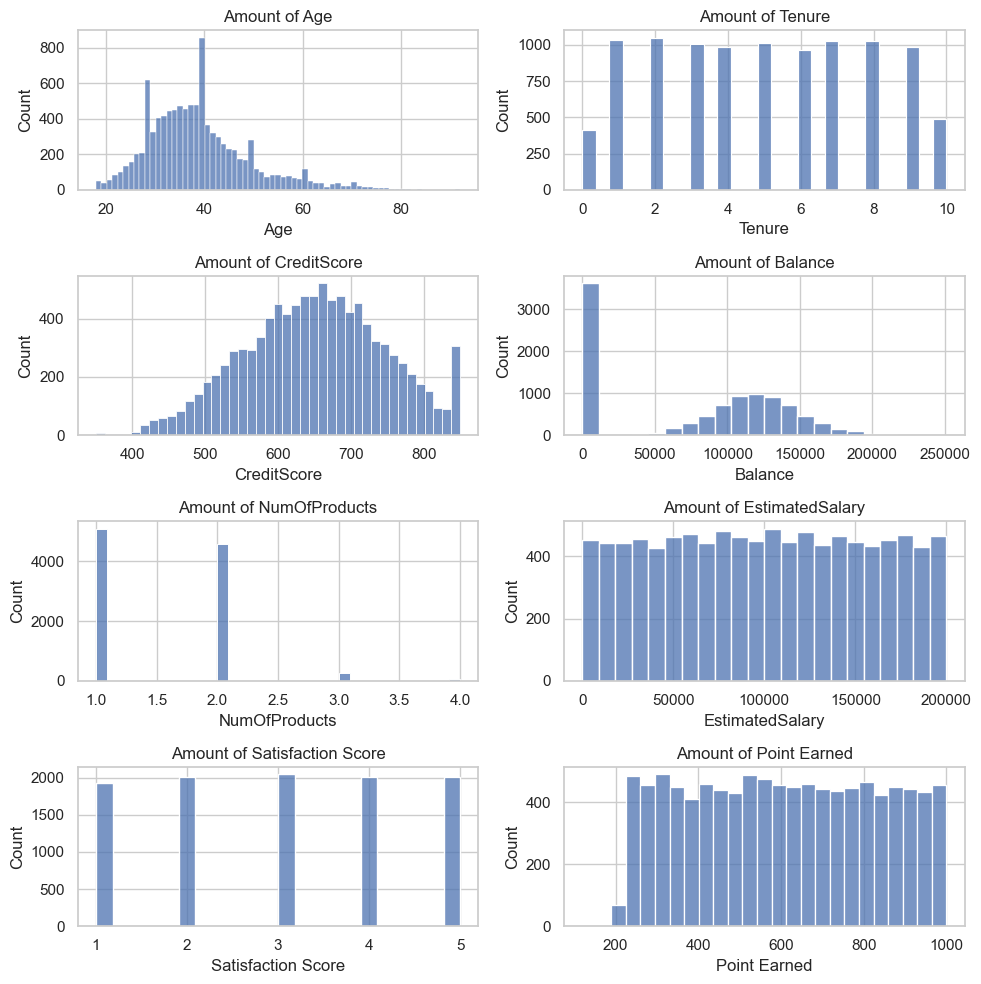

Binary columns: ['HasCrCard', 'IsActiveMember', 'Complain']


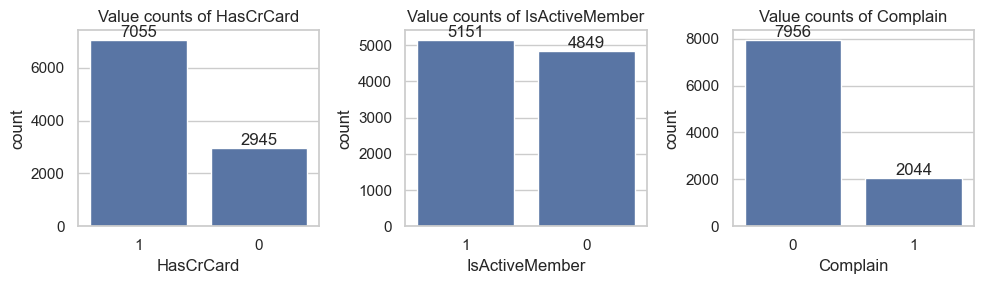

Distribution of each feature by target


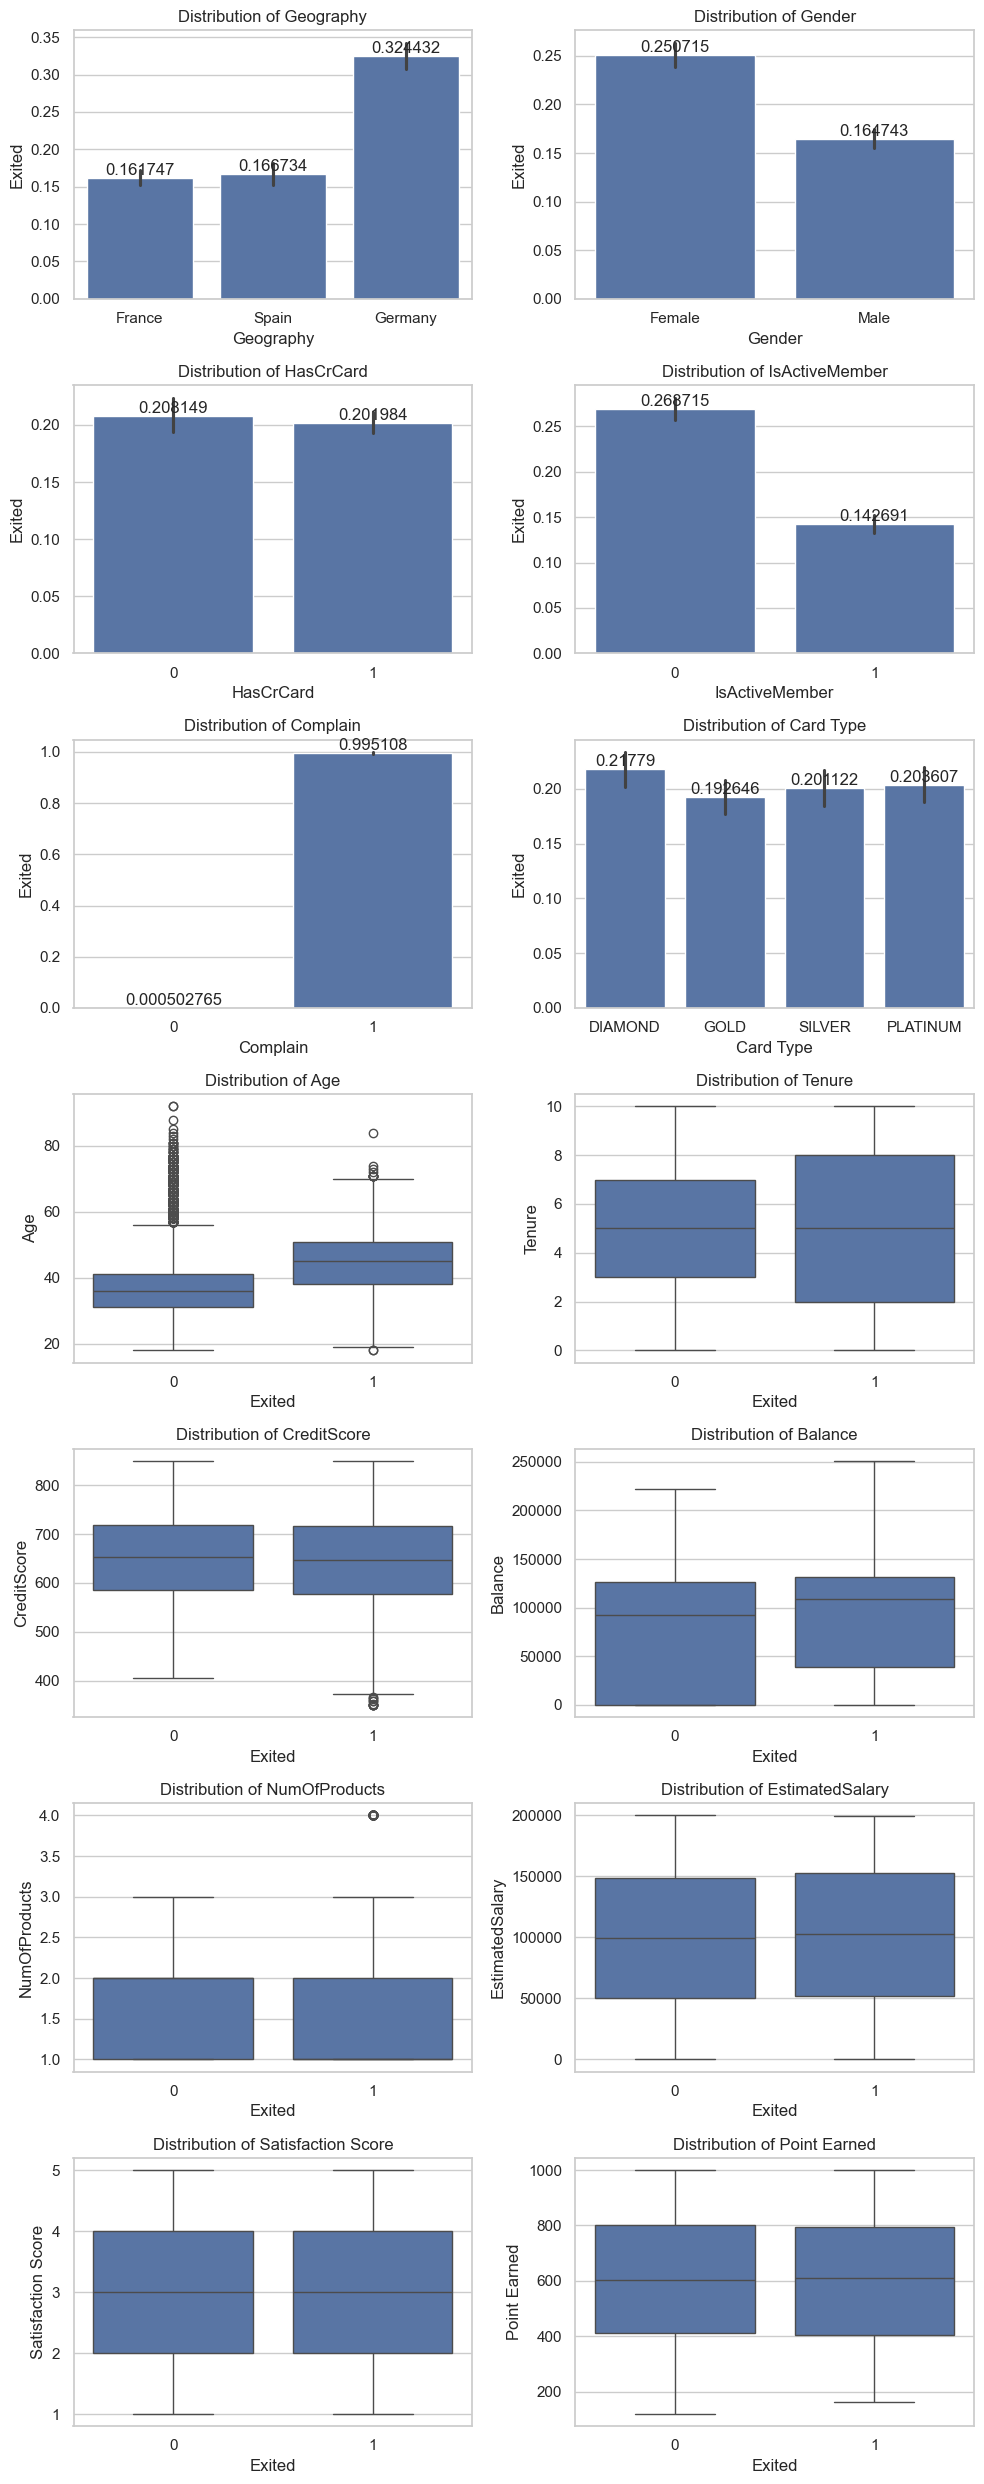

In [114]:
# list of data for graph
barlot = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']
boxlot = ['Age', 'Tenure', 'CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']
cat = ['Geography', 'Gender','Card Type']
nums = boxlot
binary = ['HasCrCard', 'IsActiveMember', 'Complain']

# visualize categorical, numeric and binary columns
print("Categorical columns:", cat)
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i in cat:
    sns.countplot(x=i, data=df, order=df[i].value_counts().index, ax=axes[cat.index(i)])
    axes[cat.index(i)].set_title(f"Value counts of {i}")
    axes[cat.index(i)].bar_label(axes[cat.index(i)].containers[0])
plt.tight_layout()
plt.show()

print("Numeric columns:", nums)
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
for j in nums:
    sns.histplot(x=j, data=df, kde=False , ax=axes[nums.index(j)//2, nums.index(j)%2])
    axes[nums.index(j)//2, nums.index(j)%2].set_title(f"Amount of {j}")
plt.tight_layout()
plt.show()

print("Binary columns:", binary)
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for k in binary:
    sns.countplot(x=k, data=df, order=df[k].value_counts().index, ax=axes[binary.index(k)])
    axes[binary.index(k)].set_title(f"Value counts of {k}")
    axes[binary.index(k)].bar_label(axes[binary.index(k)].containers[0])
plt.tight_layout()
plt.show()

# visualize churn rate of each by target
#
# for bar plot it tells that how many people Exited in each category (in term of average)
# for box plot it tells that how the distribution of numeric feature is for each category of target
#
print("Distribution of each feature by target")
fig, axes = plt.subplots(7, 2, figsize=(10, 25))

for i in barlot:
    sns.barplot(x=i, y='Exited', data=df, ax=axes[barlot.index(i)//2, barlot.index(i)%2])
    axes[barlot.index(i)//2, barlot.index(i)%2].set_title(f"Distribution of {i}")
    axes[barlot.index(i)//2, barlot.index(i)%2].bar_label(axes[barlot.index(i)//2, barlot.index(i)%2].containers[0])

for j in boxlot:
    sns.boxplot(x='Exited', y=j, data=df, ax=axes[3 + boxlot.index(j)//2, boxlot.index(j)%2])
    axes[3 + boxlot.index(j)//2, boxlot.index(j)%2].set_title(f"Distribution of {j}")

plt.tight_layout()
plt.show()
